In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse
import squarify
from matplotlib import style
import seaborn as sns
# Activate Seaborn
sns.set()
%matplotlib inline
# Large Plot
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
# Use ggplot style
style.use('seaborn-talk')

In [2]:
# import data file
expenditures = pd.read_csv('expenditures.txt',delimiter='\t')
expenditures

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
...,...,...,...,...
345,1984,Education,303,1
346,1984,Tobacco Products,228,1
347,1984,Miscellaneous,451,1
348,1984,Cash Contributions,706,1


In [3]:
area_df = pd.DataFrame(expenditures.groupby('year')['expenditure'].sum()).reset_index()
area_df

,year,expenditure
0,1984,21972
1,1985,23489
2,1986,23865
3,1987,24415
4,1988,25893
5,1989,27811
6,1990,28379
7,1991,29614
8,1992,30296
9,1993,30692


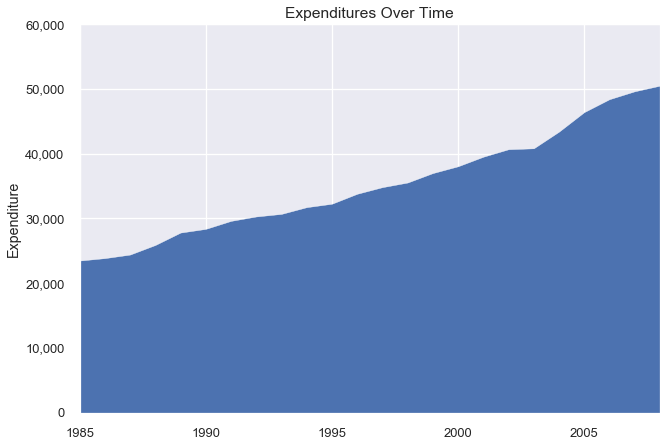

In [4]:
fig, ax = plt.subplots()
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.axis([1985, 2008,0,60000])
plt.fill_between(area_df['year'],area_df['expenditure'])
plt.ylabel('Expenditure')
plt.title('Expenditures Over Time')
plt.savefig('area.png')
plt.show()

In [5]:
top_5_df = pd.DataFrame(expenditures.groupby('category')['expenditure'].sum()).sort_values(by='expenditure',ascending = False).reset_index()
top_5_df = top_5_df[:5]
top_5_df

,category,expenditure
0,Housing,280256
1,Transportation,160694
2,Food,119297
3,Personal Insurance,84269
4,Healthcare,47383


In [6]:
pivot_df = pd.pivot_table(expenditures, 'expenditure', 'year', 'category').reset_index()
pivot_df = pivot_df[['year','Housing','Transportation','Food','Personal Insurance','Healthcare']]
pivot_df.head()

category,year,Housing,Transportation,Food,Personal Insurance,Healthcare
0,1984,6674,4304,3290,1897,1049
1,1985,7087,4587,3477,2016,1108
2,1986,7292,4842,3448,2127,1135
3,1987,7569,4600,3664,2175,1135
4,1988,8079,5093,3748,2249,1298


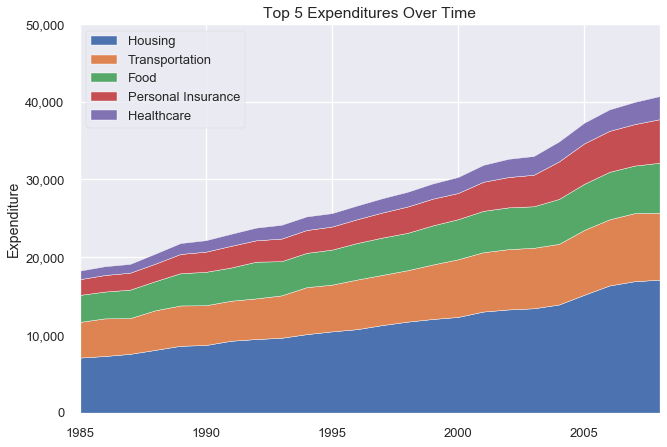

In [7]:
top_5_categories = top_5_df['category'].tolist()
fig, ax = plt.subplots()
ax.stackplot(pivot_df['year'].values, pivot_df.drop('year',axis=1).T, labels = top_5_categories)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.axis([1985, 2008,0,50000])
plt.legend(loc="upper left")
plt.ylabel('Expenditure')
plt.title('Top 5 Expenditures Over Time')
plt.savefig('s_area.png')
plt.show()

In [8]:
# Sort by expenditure
tree_df = pd.DataFrame(expenditures.groupby('category')['expenditure'].sum()).reset_index().sort_values(by="expenditure", ascending=False).reset_index(drop=True)
# Find Percentage
tree_df["percentage"] = round(100 * tree_df["expenditure"] / sum(tree_df["expenditure"]), 2)
# Create Treemap Labels
tree_df["label"] = tree_df["category"] + " (" + tree_df["percentage"].astype("str") + "%)"
#tree_df.at[8, 'category'] = "Misc"
#tree_df.at[9, 'category'] = "Edu"
tree_df.at[10, 'category'] = "Personal"
tree_df.at[11, 'category'] = "Alcohol"
tree_df.at[12, 'category'] = "Tobacco"
tree_df

,category,expenditure,percentage,label
0,Housing,280256,32.25,Housing (32.25%)
1,Transportation,160694,18.49,Transportation (18.49%)
2,Food,119297,13.73,Food (13.73%)
3,Personal Insurance,84269,9.70,Personal Insurance (9.7%)
4,Healthcare,47383,5.45,Healthcare (5.45%)
5,Entertainment,44273,5.10,Entertainment (5.1%)
6,Apparel,41833,4.81,Apparel (4.81%)
7,Cash Contributions,27987,3.22,Cash Contributions (3.22%)
8,Miscellaneous,18327,2.11,Miscellaneous (2.11%)
9,Education,14498,1.67,Education (1.67%)


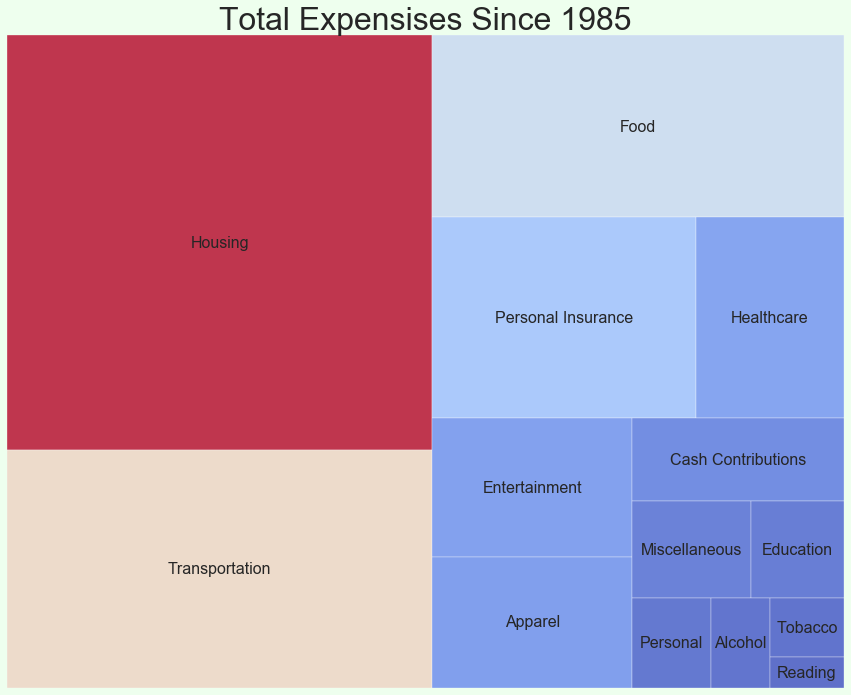

In [10]:
a4_dims = (15, 12)
# Get Axis and Figure
fig, ax = plt.subplots(figsize=a4_dims)
# Our Colormap
cmap = matplotlib.cm.coolwarm
# Min and Max Values
mini = min(tree_df["expenditure"])
maxi = max(tree_df["expenditure"])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in tree_df["expenditure"]]
# Plotting
squarify.plot(sizes=tree_df["expenditure"], label=tree_df["category"], alpha=0.8, color=colors, text_kwargs={'fontsize':16})
# Removing Axis
plt.axis('off')
# Invert Y-Axis
plt.gca().invert_yaxis()
# Title
plt.title("Total Expensises Since 1985", fontsize=32)
plt.savefig('tree_map.png')
# Title Positioning
ttl = ax.title
ttl.set_position([.5, 1.05])
# BG Color
fig.set_facecolor('#eeffee')